# The Sparks Foundation

# Task 2: Prediction Using Unsupervised Machine Learning

## `1.` Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## `2.` Data Cleaning

In [4]:
iris.shape

(150, 6)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
counts = iris['Species'].value_counts()
counts

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## `3.` Data Visualization

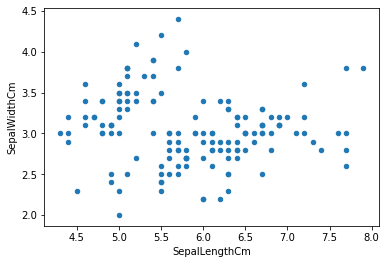

In [9]:
iris.plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm")

J:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


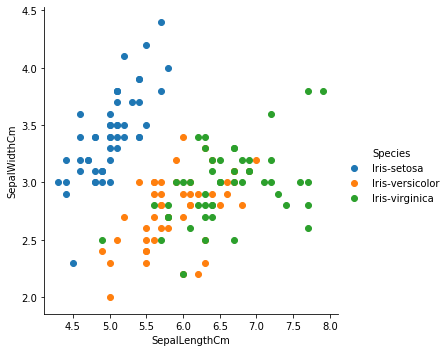

In [10]:
sb.FacetGrid(iris, hue = "Species", size = 5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

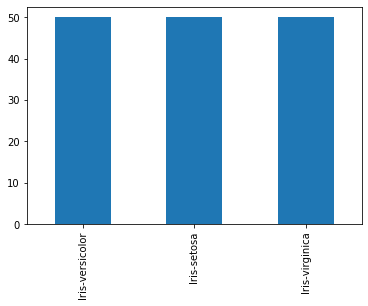

In [11]:
counts.plot(kind = 'bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D983ECDF48>,
      dtype=object)

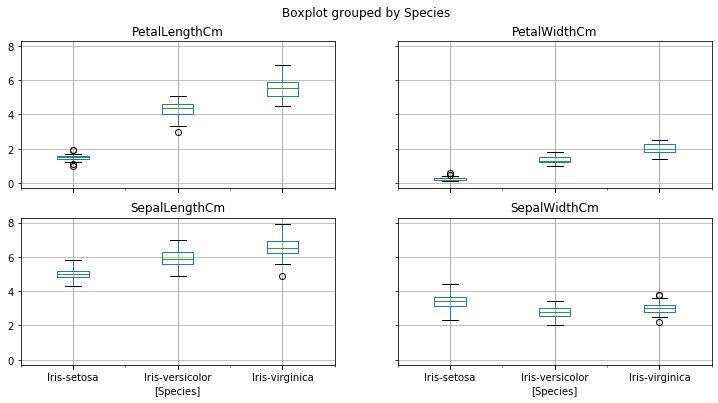

In [12]:
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

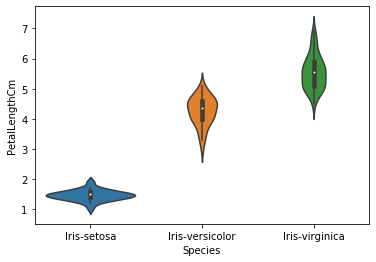

In [13]:
sb.violinplot(x = "Species", y = "PetalLengthCm", data = iris, size = 6)

J:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


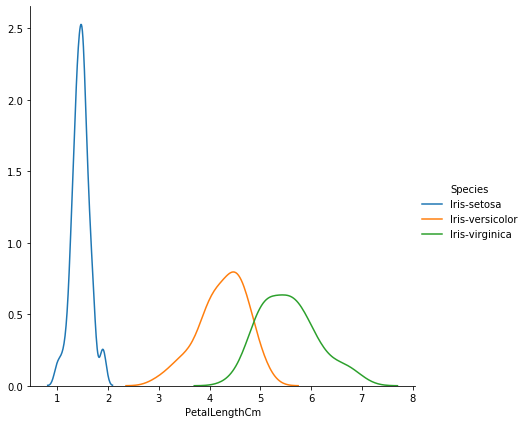

In [14]:
sb.FacetGrid(iris, hue = "Species", size = 6) \
   .map(sb.kdeplot, "PetalLengthCm") \
   .add_legend()

J:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


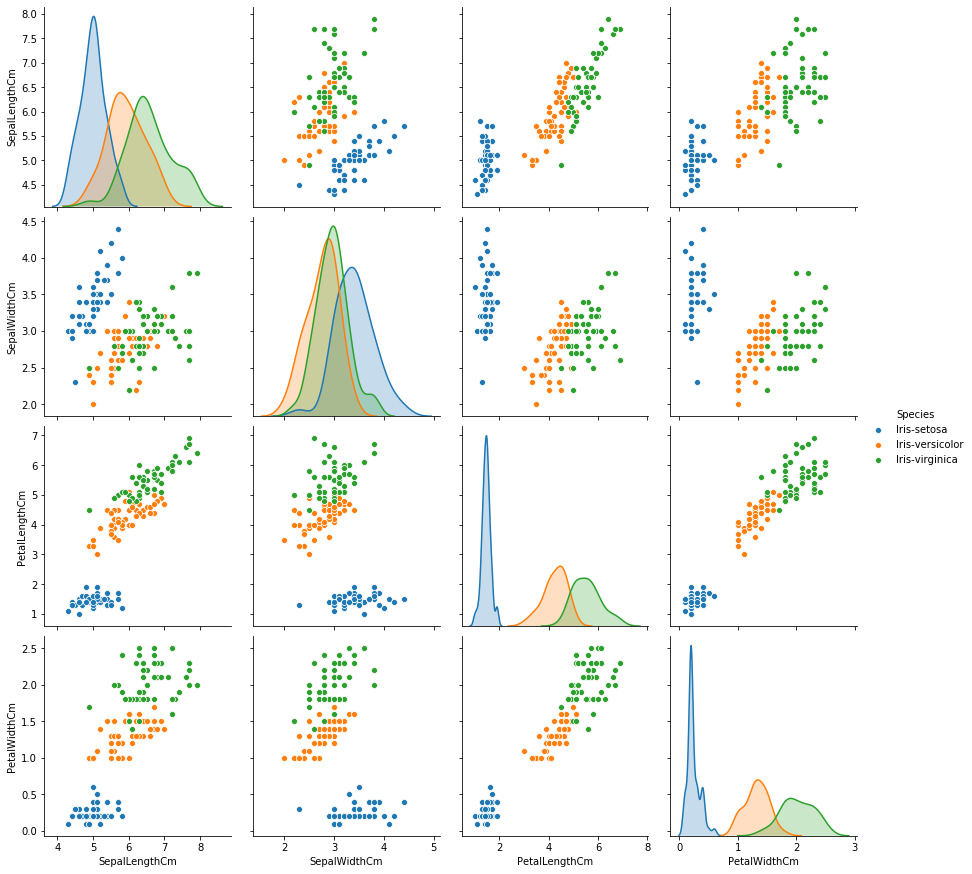

In [15]:
sb.pairplot(iris.drop("Id", axis = 1), hue = "Species", size=3)

## `3.` Performing KMeans Clustering

In [16]:
x = iris.iloc[:, [0, 1, 2, 3]].values

In [17]:
from sklearn.cluster import KMeans

cluster_errors = []
cluster_range = range( 1, 10)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5,max_iter=100)
    clusters.fit(x)
    labels = clusters.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    cluster_errors.append( clusters.inertia_ )    # capture the intertia

print('Labels', labels)
 
print('Centroids', centroids)

print('Inertia', clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df

Labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
Centroids [[  9.5          4.99444444   3.44444444   1.41666667]
 [105.           6.35882353   2.90588235   5.24705882]
 [ 42.5          4.9125       3.2875       1.4375    ]
 [141.           6.55263158   3.04736842   5.44210526]
 [ 73.           6.16666667   2.8          4.42      ]
 [122.5          6.63888889   2.91666667   5.58888889]
 [ 88.5          5.75         2.73125      4.2125    ]
 [ 26.5          5.1125       3.51875      1.54375   ]
 [ 58.           5.97333333   2.78         4.24666667]]
Inertia 3618.032063252494


,num_clusters,cluster_errors
0,1,281831.544667
1,2,70581.380800
2,3,31320.711200
3,4,17773.729924
4,5,11434.318466
5,6,7934.569565
6,7,5914.962414
7,8,4562.780079
8,9,3618.032063


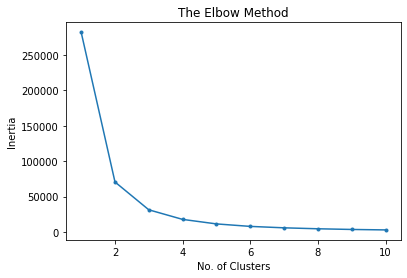

In [18]:
ks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x)
    inertia.append(model.inertia_)
    
plt.plot(ks,inertia,marker=".")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

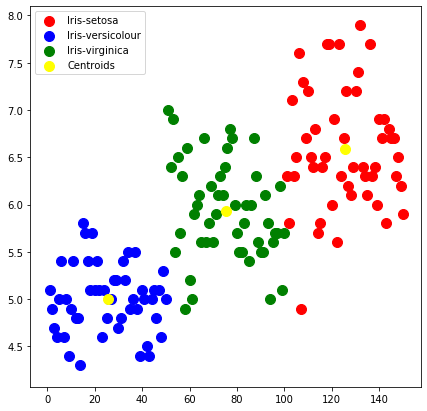

In [23]:
plt.figure(figsize = (7, 7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()